In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import datetime
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:\windows/fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [2]:
name_list = fdr.StockListing('KRX')
name_list = name_list.loc[:,['Symbol','Name']]

In [3]:
#########변수###########
code = ['000270','000660','000810','001250'] #기아차,sk하이닉스, 삼성화재
#종목코드 입력
start_date = '2016-01-01' #시작일
end_date = '2019-12-01' #종료일
########################

In [4]:
sample = pd.DataFrame(columns = ['Symbol','Name'])
k = 0
for i in range(len(name_list)):
    if name_list.iloc[i,0] in code:
        sample.at[k,'Symbol'] = name_list.iloc[i,0]
        sample.at[k,'Name'] = name_list.iloc[i,1]
        k += 1

selected = [i for i in sample['Name']]
 
table = pd.DataFrame()
for i in sample.values:
    temp = fdr.DataReader(i[0],start_date,end_date)
    temp_2 = pd.DataFrame({i[1]:temp['Close']})
    table = pd.concat([table,temp_2],axis = 1)

In [5]:
selected

['GS글로벌', '삼성화재해상보험', 'SK하이닉스', '기아자동차']

In [6]:
!jupyter nbextension enable --py widgetsnbextension 

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [8]:
import ipywidgets as widgets 

from ipywidgets import interact, interact_manual

In [9]:
import datetime 

def days_between(start_dt,end_dt): 

    # 시작일과 종료일 사이에 며칠이 있는지 계산합니다. 

    print((end_dt-start_dt))


In [10]:
interact(days_between, 
            start_dt=widgets.DatePicker(value=datetime.date(2016,1,1)),
            end_dt=widgets.DatePicker(value=datetime.date(2019,12,1)));


1430 days, 0:00:00


In [11]:
# x, y 값에 해당하는 위젯을 생성해 줍니다. 
# 0 ~ 100 범위 
# 한 칸의 단위: 5 
# 기본값: 50 
x = widgets.IntSlider(min=0, max=50, step=5, value=25) 
y = widgets.IntSlider(min=0, max=50, step=5, value=25)
z = widgets.IntSlider(min=0, max=50, step=5, value=25)
k = widgets.IntSlider(min=0, max=50, step=5, value=25)

def update_x_range(*args): 
    x.value = 50 - y.value 
def update_y_range(*args):
    y.value = 50 - x.value 
def update_z_range(*args): 
    z.value = 50 - k.value 
def update_k_range(*args): 
    k.value = 50 - z.value 

# x 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
x.observe(update_y_range, 'value') 
# y 값을 관찰하여 변동이 생기면 x의 값을 업데이트합니다. 
y.observe(update_x_range, 'value')
# z 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
z.observe(update_k_range, 'value') 
# k 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
k.observe(update_z_range, 'value') 

def printer(x,y,z,k): 
    print(x,y,z,k) 
# printer 함수와 위젯을 연결합니다. 
interact(printer, x=x, y=y, z=z, k = k);

25 25 25 25


In [12]:
# x, y 값에 해당하는 위젯을 생성해 줍니다. 
# 0 ~ 100 범위 
# 한 칸의 단위: 5 
# 기본값: 50 
x = widgets.IntSlider(min=0, max=50, step=5, value=25) 
y = widgets.IntSlider(min=0, max=50, step=5, value=25)
z = widgets.IntSlider(min=0, max=50, step=5, value=25)
k = widgets.IntSlider(min=0, max=50, step=5, value=25)

def update_x_range(*args): 
    x.value = 50 - y.value 
def update_y_range(*args):
    y.value = 50 - x.value 
def update_z_range(*args): 
    z.value = 50 - k.value 
def update_k_range(*args): 
    k.value = 50 - z.value 

# x 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
x.observe(update_y_range, 'value') 
# y 값을 관찰하여 변동이 생기면 x의 값을 업데이트합니다. 
y.observe(update_x_range, 'value')
# z 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
z.observe(update_k_range, 'value') 
# k 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
k.observe(update_z_range, 'value') 


In [13]:
def get_port_return(start_date, end_date, code_1_weight, code_2_weight,code_3_weight, code_4_weight): 

    code_1_weight /= 100
    code_2_weight /= 100
    code_3_weight /= 100
    code_4_weight /= 100
    
    data = table[start_date:end_date] 
    pct_return = (data - data.iloc[0]) / data.iloc[0] 
    pct_return.columns = selected 

    code_1_return = pct_return.iloc[:,0]
    code_2_return = pct_return.iloc[:,1]
    code_3_return = pct_return.iloc[:,2]
    code_4_return = pct_return.iloc[:,3]
    portfolio_return = (pct_return * [code_1_return, code_2_return,code_3_return,code_4_return]).sum(axis=1) 
    
    code_1_return.plot(label= selected[0], figsize=(14,8)); 
    code_2_return.plot(label=selected[1]);
    code_3_return.plot(label=selected[2], figsize=(14,8)); 
    code_4_return.plot(label=selected[3]);
    portfolio_return.plot(label='Portfolio'); 
    plt.legend()
    
    

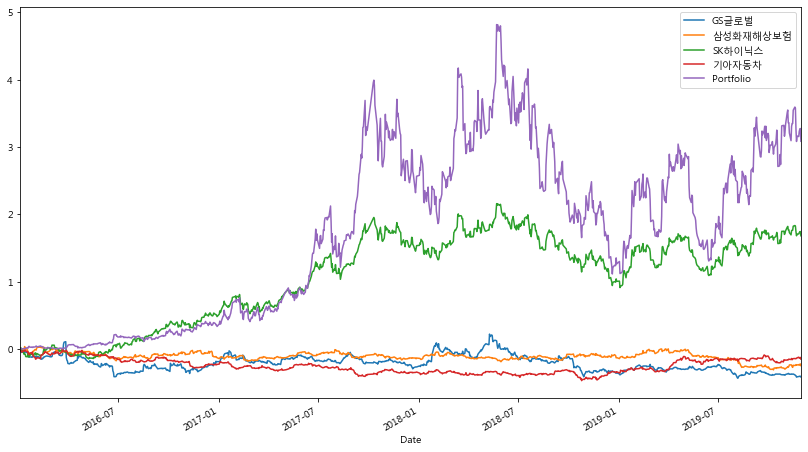

In [14]:
interact(get_port_return,code_1_weight=x, code_2_weight=y, code_3_weight=z, code_4_weight=k, 
            start_date=widgets.DatePicker(value=pd.to_datetime('2016-01-01')), 
            end_date=widgets.DatePicker(value=pd.to_datetime('2019-12-01')));


In [15]:
logret_df = np.log(table / table.shift(1)) 
logret_df.head()
#로그 수익률 계산, 계산에 편리함을 위해 log사용.  shift(1)은 가격을 1일 뒤로 미루는 역할을
#01일 미뤄진 종가가 로그 수익률 공식에서 '처음 주가' 자리를 차지


,GS글로벌,삼성화재해상보험,SK하이닉스,기아자동차
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.001842,-0.009788,0.014815,-0.001970
2016-01-06,-0.018876,0.021088,0.004890,-0.025975
2016-01-07,-0.026929,-0.029318,-0.018048,-0.002026
2016-01-08,-0.004144,0.003300,-0.016695,-0.016360


In [54]:
logret_df = logret_df.dropna() 
logret_df.columns = selected
logret_df.head()
logret_df.tail()
#2016년 1월 4일 매수 후 일별 로그 기대수익률 

,GS글로벌,삼성화재해상보험,SK하이닉스,기아자동차
Date,,,,
2019-11-25,0.008909,0.006349,0.000000,0.011249
2019-11-26,0.000000,-0.012739,0.007317,-0.016921
2019-11-27,0.008830,0.019048,0.004848,0.003407
2019-11-28,-0.002200,0.006270,0.001208,0.010152
2019-11-29,-0.017778,-0.031749,-0.023214,-0.029615


In [16]:
mu_log = logret_df.mean() 
mu_log
#일별 log수익률 평균

GS글로벌      -0.000557
삼성화재해상보험   -0.000294
SK하이닉스      0.001030
기아자동차      -0.000168
dtype: float64

In [17]:
mu = logret_df.mean() * 252
mu
#년간 기대수익률을 추정하고 싶다면 위에 계산된 일별 로그수익률에 1년간 거래일(여기서는 252일을 사용)을 곱해주면 됩니다.
#각 각 년간 기대수익률은 -14%, -7%. 25%,-4%로 나타남 

GS글로벌      -0.140481
삼성화재해상보험   -0.073972
SK하이닉스      0.259636
기아자동차      -0.042324
dtype: float64

In [18]:
 mu.values

array([-0.1404812 , -0.07397162,  0.25963599, -0.04232419])

In [19]:
# 주식 50%, 채권 50%를 가정 
w = np.array([0.25, 0.25,0.25,0.25]) 
# port_return: 포트폴리오의 기대수익률 
port_return = w.dot(mu) 
port_return 

0.0007147450305087372

In [20]:
logret_df.std() #자산별 수익률의 변동성(voatiity)

GS글로벌       0.025140
삼성화재해상보험    0.014572
SK하이닉스      0.021869
기아자동차       0.016039
dtype: float64

In [21]:
logret_df.std() * np.sqrt(252)#자산별  1년간 lisk

GS글로벌       0.399091
삼성화재해상보험    0.231320
SK하이닉스      0.347167
기아자동차       0.254604
dtype: float64

In [22]:
# cov_mat : 공분산 행렬(Covariance Matrix) 1
cov_mat = logret_df.cov() * 252 
cov_mat = cov_mat.values # 행렬구조로 저장합니다 
cov_mat

array([[ 0.1592733 ,  0.01047374,  0.0163563 ,  0.01254215],
       [ 0.01047374,  0.05350912, -0.00457149,  0.00701321],
       [ 0.0163563 , -0.00457149,  0.12052514,  0.00626245],
       [ 0.01254215,  0.00701321,  0.00626245,  0.06482327]])

In [23]:
# 포트폴리오의 Risk(=표준편차)를 계산합니다. 
port_var = np.dot(np.dot(w, cov_mat), w.T) 
port_std = np.sqrt(port_var) 
print("Portfolio Risk: ", port_std)

Portfolio Risk:  0.17576325385721622


In [24]:
port_return #포트폴리오 1년 수익률

0.0007147450305087372

In [25]:
port_std #포트폴리오 1년 lisk

0.17576325385721622

In [26]:
mu[0] #GS글로벌 1년 수익률

-0.14048120346680756

In [27]:
np.sqrt(cov_mat[0][0])  #GS글로벌 1년 LISK

0.39909059126931606

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


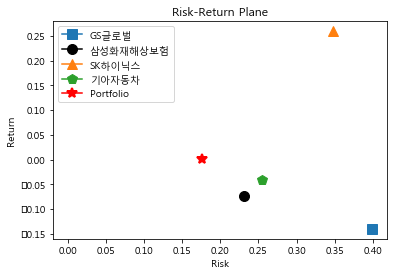

In [28]:
plt.figure() 

plt.plot(np.sqrt(cov_mat[0][0]),mu[0], marker='s', color='#1F77B4', markeredgewidth=1, markersize=10, label=selected[0]); 
plt.plot(np.sqrt(cov_mat[1][1]),mu[1], marker='o', color='k', markeredgewidth=1, markersize=10, label=selected[1]); 
plt.plot(np.sqrt(cov_mat[2][2]),mu[2], marker='^', color='#FF7F0E', markeredgewidth=1, markersize=10, label=selected[2]); 
plt.plot(np.sqrt(cov_mat[3][3]),mu[3], marker='p', color='#2CA02C', markeredgewidth=1, markersize=10, label=selected[3]); 

# 포트폴리오
plt.plot(port_std, port_return, marker='*', color='red', markeredgewidth=2, markersize=10, label='Portfolio') 
plt.plot(0,0) 
plt.title('Risk-Return Plane') 
plt.xlabel('Risk') 
plt.ylabel('Return') 
plt.legend();

In [29]:
def calc_pfo_return(mu, w): 
    return w.dot(mu)

def calc_pfo_vol(Sigma, w): 
    return np.dot(np.dot(w, Sigma), w.T) ** 0.5

def plot_cum_return(ax, pct_return, w): 
    first_return = (pct_return * [1, 0,0,0]).sum(axis=1) # 코스피에 100% 
    second_return = (pct_return * [0,1,0,0]).sum(axis=1) # 채권 ETf에 100% 
    thirdth_return = (pct_return * [0, 0,1,0]).sum(axis=1) # 코스피에 100% 
    fourth_return = (pct_return * [0, 0,0,1]).sum(axis=1) # 채권 ETf에 100% 
    portfolio_return = (pct_return * w).sum(axis=1) # 포트폴리오 비중대로 
    
    # label을 달아줍니다. 
    ax.plot(first_return, label=selected[0]); 
    ax.plot(second_return, label=selected[1]); 
    ax.plot(thirdth_return, label=selected[2]); 
    ax.plot(fourth_return, label=selected[3]); 
    ax.plot(portfolio_return, label='Portfolio');
    
    # 타이틀과 축 이름을 설정합니다. 
    ax.set_title('Cummulative Percent Return') 
    ax.set_xlabel('Date') 
    ax.set_ylabel('Return (%)') 
    ax.legend()


In [30]:
logret_df.head()

,GS글로벌,삼성화재해상보험,SK하이닉스,기아자동차
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.001842,-0.009788,0.014815,-0.001970
2016-01-06,-0.018876,0.021088,0.004890,-0.025975
2016-01-07,-0.026929,-0.029318,-0.018048,-0.002026
2016-01-08,-0.004144,0.003300,-0.016695,-0.016360


In [31]:
mu

GS글로벌      -0.140481
삼성화재해상보험   -0.073972
SK하이닉스      0.259636
기아자동차      -0.042324
dtype: float64

In [32]:
a = w.dot(mu)
a

0.0007147450305087372

In [33]:
calc_pfo_return(mu,w)

0.0007147450305087372

In [34]:
np.dot(np.dot(w, a), w.T) ** 0.5

0.013367357914980218

In [35]:
def plot_cum_return(ax, pct_return, w): 
    first_return = (pct_return * [1, 0,0,0]).sum(axis=1) # 코스피에 100% 
    second_return = (pct_return * [0,1,0,0]).sum(axis=1) # 채권 ETf에 100% 
    thirdth_return = (pct_return * [0, 0,1,0]).sum(axis=1) # 코스피에 100% 
    fourth_return = (pct_return * [0, 0,0,1]).sum(axis=1) # 채권 ETf에 100% 
    portfolio_return = (pct_return * w).sum(axis=1) # 포트폴리오 비중대로 
    
    # label을 달아줍니다. 
    ax.plot(first_return, label=selected[0]); 
    ax.plot(second_return, label=selected[1]); 
    ax.plot(thirdth_return, label=selected[2]); 
    ax.plot(fourth_return, label=selected[3]); 
    ax.plot(portfolio_return, label='Portfolio');
    
    # 타이틀과 축 이름을 설정합니다. 
    ax.set_title('Cummulative Percent Return') 
    ax.set_xlabel('Date') 
    ax.set_ylabel('Return (%)') 
    ax.legend()

In [36]:
logret = logret_df[start_date:end_date] 
pct_return = np.exp(logret.cumsum()) - 1
pct_return.tail()

,GS글로벌,삼성화재해상보험,SK하이닉스,기아자동차
Date,,,,
2019-11-25,-0.407203,-0.230519,1.709784,-0.120079
2019-11-26,-0.407203,-0.240260,1.729685,-0.134843
2019-11-27,-0.401945,-0.225649,1.742952,-0.131890
2019-11-28,-0.403260,-0.220779,1.746269,-0.123031
2019-11-29,-0.413775,-0.245130,1.683250,-0.148622


In [37]:
(pct_return * [1, 0,0,0]).sum(axis=1).tail()

Date
2019-11-25   -0.407203
2019-11-26   -0.407203
2019-11-27   -0.401945
2019-11-28   -0.403260
2019-11-29   -0.413775
dtype: float64

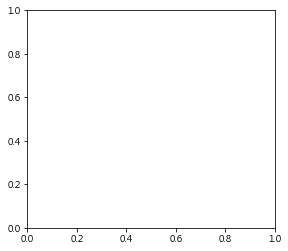

In [38]:
    ax1 = plt.subplot2grid((1,4), (0,0), colspan=3, rowspan=1)

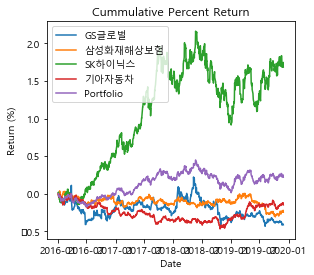

In [106]:
    ax1 = plt.subplot2grid((1,4), (0,0), colspan=3, rowspan=1)
plot_cum_return(ax1,pct_return,w)

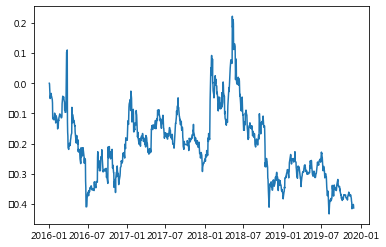

In [39]:
   plt.plot((pct_return * [1, 0,0,0]).sum(axis=1), label=selected[0]); 

In [40]:
def plot_mean_variance(ax, logret, w): 
    # 자산의 년 환산 기대수익률과 공분산 행렬을 계산합니다. 
    mu = logret.mean().values * 252 
    Sigma = logret.cov().values * 252 
    
    # 자산별 risk와 return을 계산하여 그래프에 출력합니다. 
    ax.plot(Sigma[0][0] ** 0.5, mu[0], marker='s', color='#1F77B4', markeredgewidth=1, markersize=10, label=selected[0]); 
    ax.plot(Sigma[1][1] ** 0.5, mu[1], marker='o', color='k', markeredgewidth=1, markersize=10, label=selected[1]); 
    ax.plot(Sigma[2][2] ** 0.5, mu[2], marker='^', color='#FF7F0E', markeredgewidth=1, markersize=10, label=selected[2]); 
    ax.plot(Sigma[3][3] ** 0.5, mu[3], marker='p', color='#2CA02C', markeredgewidth=1, markersize=10, label=selected[3]); 
    
    # 위에서 만든 함수를 호출하여 포트폴리오의 risk와 return 을 계산합니다. 
    pfo_vol = calc_pfo_vol(Sigma, w) 
    pfo_return = calc_pfo_return(mu, w) 
    
    # 계산된 포트폴리오의 risk와 return을 그래프에 표시합니다. 
    ax.plot(pfo_vol, pfo_return, marker='x', color='#2CA02C', mrkeredgewidth=2, markersize=10, label='Portfolio') 

    # 원점이 나오도록 표시해주고 타이틀과 축 이름을 설정합니다. 
    ax.plot(0,0) 
    ax.set_title('Risk-Return Plane') 
    ax.set_xlabel('Volatility') 
    ax.set_ylabel('Log Return') 
    ax.legend()


In [41]:
# x, y 값에 해당하는 위젯을 생성해 줍니다. 
# 0 ~ 100 범위 
# 한 칸의 단위: 5 
# 기본값: 50 
x = widgets.IntSlider(min=0, max=50, step=5, value=25) 
y = widgets.IntSlider(min=0, max=50, step=5, value=25)
z = widgets.IntSlider(min=0, max=50, step=5, value=25)
k = widgets.IntSlider(min=0, max=50, step=5, value=25)

def update_x_range(*args): 
    x.value = 50 - y.value 
def update_y_range(*args):
    y.value = 50 - x.value 
def update_z_range(*args): 
    z.value = 50 - k.value 
def update_k_range(*args): 
    k.value = 50 - z.value 

# x 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
x.observe(update_y_range, 'value') 
# y 값을 관찰하여 변동이 생기면 x의 값을 업데이트합니다. 
y.observe(update_x_range, 'value')
# z 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
z.observe(update_k_range, 'value') 
# k 값을 관찰하여 변동이 생기면 y의 값을 업데이트합니다.
k.observe(update_z_range, 'value') 

AttributeError: 'Line2D' object has no property 'mrkeredgewidth'

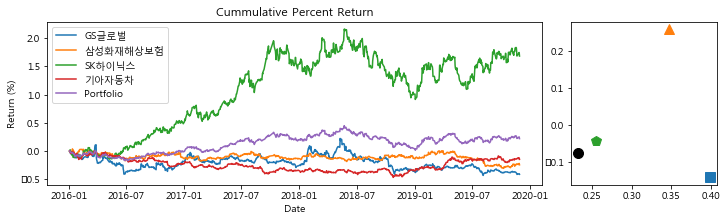

In [42]:
def get_port_return(start_date, end_date, first_weight, second_weight,thirdth_weight,fourth_weight): 
    # 비중을 세팅합니다. 
    first_weight /= 100 
    second_weight /= 100 
    thirdth_weight /= 100 
    fourth_weight /= 100 
    w = np.array([first_weight, second_weight, thirdth_weight, fourth_weight]) 
    
    # 해당 기간의 로그 수익률 가져옵니다. 
    logret = logret_df[start_date:end_date] 
   
    # 로그 수익률을 퍼센트로 변환합니다. 
    pct_return = np.exp(logret.cumsum()) - 1 

    # figure 생성 
    fig = plt.figure(figsize=(12,3)) 

    # subplot2grid를 사용하여 그래프 레이아웃을 잡아줍니다. 
    # ax1 그래프가 가로 비율 3만큼 차지하도록 만들어 줍니다. 
    ax1 = plt.subplot2grid((1,4), (0,0), colspan=3, rowspan=1) 
    plot_cum_return(ax1, pct_return, w) # ax1에 누적 수익률 그래프를 출력합니다. 

    # ax2 그래프가 가로 비율 1만큼 차지하도록 만들어 줍니다. 
    ax2 = plt.subplot2grid((1,4), (0,3)) 
    plot_mean_variance(ax2, logret, w) # ax2에 risk-return 그래프를 출력합니다. 
    plt.tight_layout() 
    
interact(get_port_return,first_weight=x, second_weight=y, thirdth_weight=z, fourth_weight=k,
        start_date=widgets.DatePicker(value=pd.to_datetime('2016-01-01')),    
         end_date=widgets.DatePicker(value=pd.to_datetime('2019-12-01'))); 
